In [1]:
%matplotlib inline

import gym
import matplotlib
import numpy as np
import sys

from collections import defaultdict

if "../" not in sys.path:
  sys.path.append("../") 
from lib.envs.blackjack import BlackjackEnv
from lib import plotting

matplotlib.style.use('ggplot')

In [2]:
env = BlackjackEnv()

In [73]:
def mc_prediction(policy, env, num_episodes, discount_factor=1.0):
    """
    Monte Carlo prediction algorithm. Calculates the value function
    for a given policy using sampling.
    
    Args:
        policy: A function that maps an observation to action probabilities.
        env: OpenAI gym environment.
        num_episodes: Number of episodes to sample.
        discount_factor: Gamma discount factor.
    
    Returns:
        A dictionary that maps from state -> value.
        The state is a tuple and the value is a float.
    """

    # Keeps track of sum and count of returns for each state
    # to calculate an average. We could use an array to save all
    # returns (like in the book) but that's memory inefficient.
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)
    
    # The final value function
    V = defaultdict(float)
    
    ##PART 1: Creating Episode::--
    ##Should be like : [S,A,R,S,A,R,S,A,R,.....,S,A,R]
    for ep_i in range(num_episodes):
        episode = []
        state = env.reset()
        #state has: score, dealer_score, usable_ace
        
        for turn in range(100):
            action = policy(state)
            next_state, reward, episode_complete, _  = env.step(action)
            episode.append((state, action, reward))
            state = next_state
            
            if episode_complete:
                break
        
        
    ##PART 2: Iterating through each step of the episode.
        for i,SAR_seq in enumerate(episode):
            
            #This is First-Visit-Algorithm, look at Markdown below
            G=0
            G = discount_factor*G + SAR_seq[2]
            for mini_seq in episode[i:]:
                if SAR_seq[0]!=mini_seq[0]:  
                    G = discount_factor*G + mini_seq[2]
            
            returns_sum[SAR_seq[0]] += G
            returns_count[SAR_seq[0]] += 1
            
            V[SAR_seq[0]] = returns_sum[SAR_seq[0]]/returns_count[SAR_seq[0]] 
        
                
    # Implement this!

    return V    

![](https://i.stack.imgur.com/Q8YCg.png)

In [20]:
next?

Docstring:
next(iterator[, default])

Return the next item from the iterator. If default is given and the iterator
is exhausted, it is returned instead of raising StopIteration.
Type:      builtin_function_or_method


In [74]:
def sample_policy(observation):
    """
    A policy that sticks if the player score is > 20 and hits otherwise.
    """
    score, dealer_score, usable_ace = observation
    return 0 if score >= 20 else 1

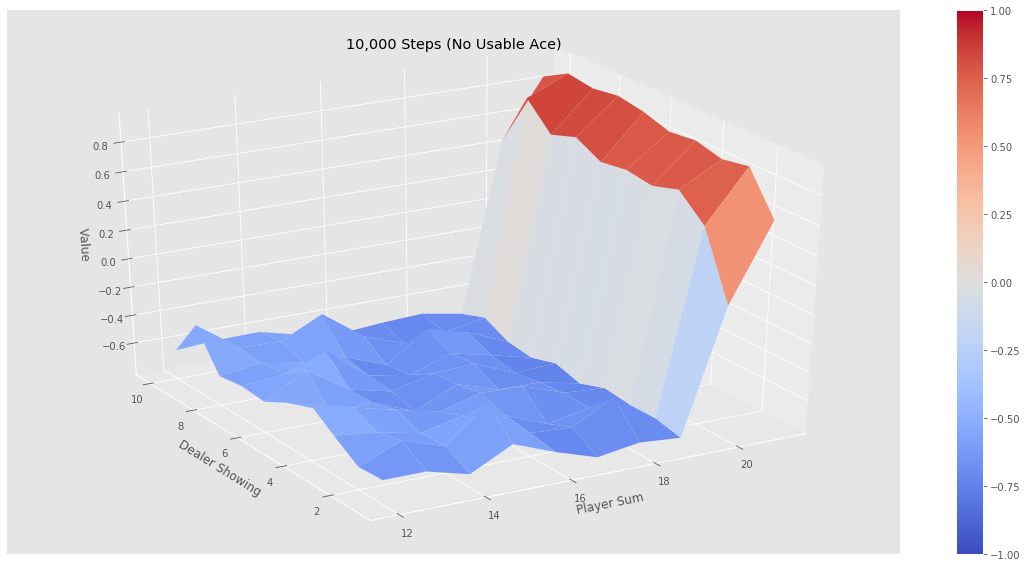

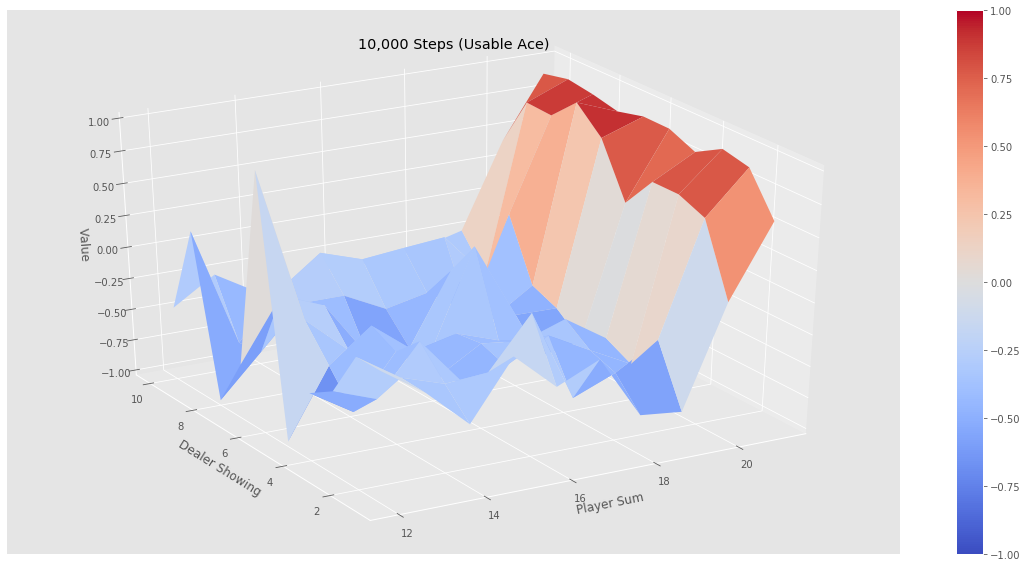

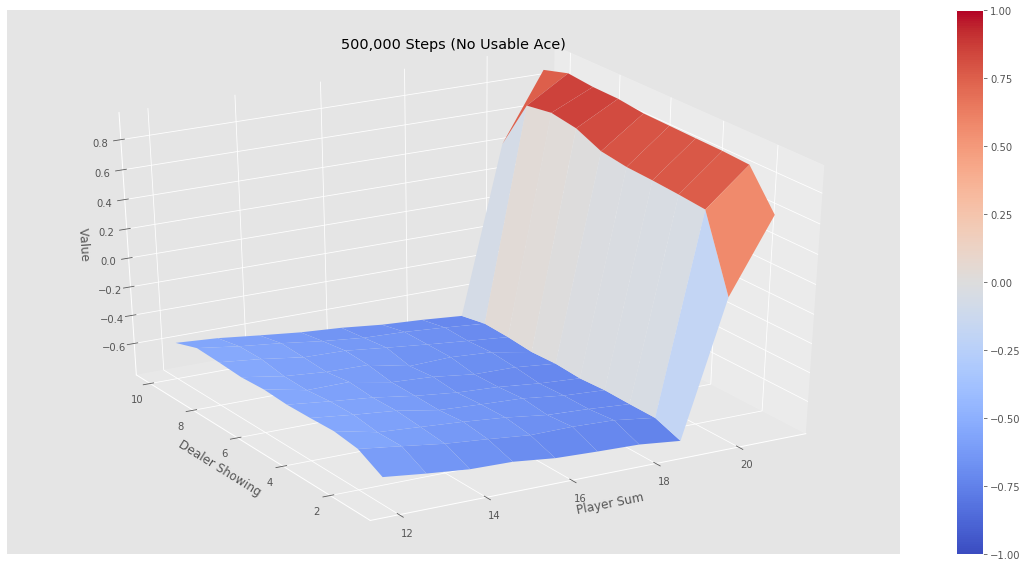

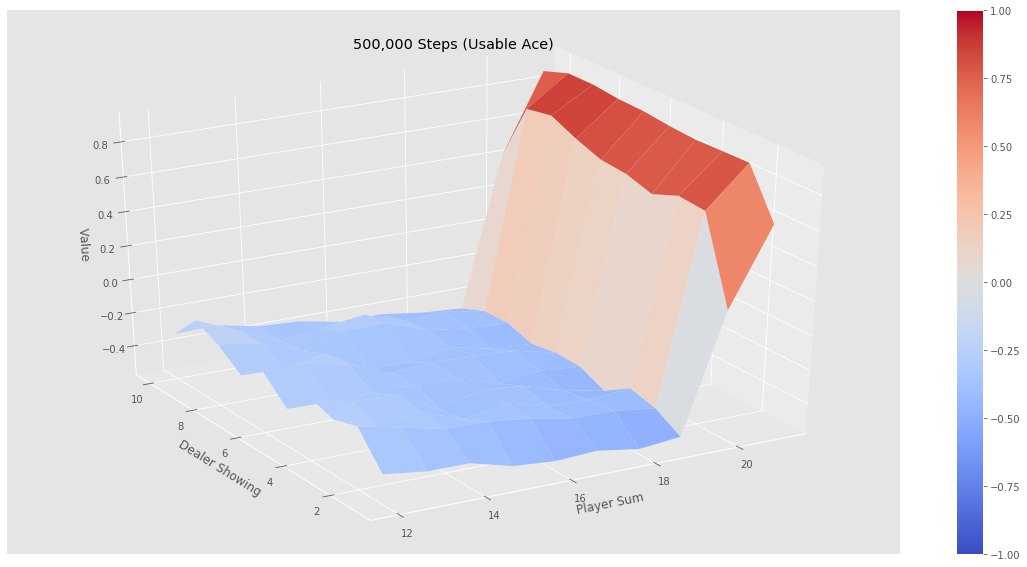

In [75]:
V_10k = mc_prediction(sample_policy, env, num_episodes=10000)
plotting.plot_value_function(V_10k, title="10,000 Steps")

V_500k = mc_prediction(sample_policy, env, num_episodes=500000)
plotting.plot_value_function(V_500k, title="500,000 Steps")

In [32]:
next(i for i in range(10) if i==7)

7

In [61]:
episode = [(1,2,3),(4,5,6),(7,8,9)]
x = set(x[0] for x in episode)

In [54]:
set(x[0] for x in episode)

{1, 4, 7}

In [65]:
tuple([2,2])

(2, 2)